In [44]:
from sklearn.datasets import load_iris
iris = load_iris() 
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
X, y = iris.data, iris.target
X.shape, y.shape, set(y) 

((150, 4), (150,), {0, 1, 2})

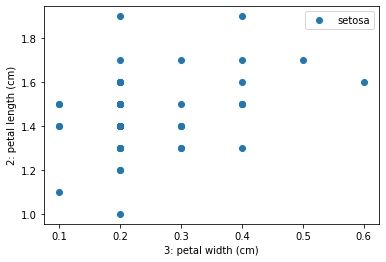

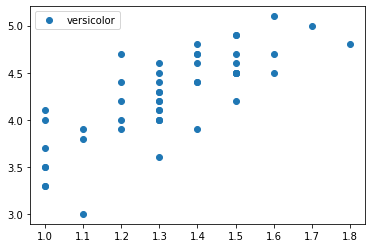

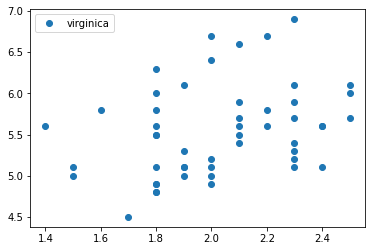

In [46]:
import matplotlib.pyplot as plt
i, j = 3,2
plt.xlabel(f"{i}: {iris.feature_names[i]}")
plt.ylabel(f"{j}: {iris.feature_names[j]}")
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{iris.target_names[k]}")
    plt.legend()
    plt.show()

In [47]:
X32 = X [:, [3,2]]
X32.shape

(150, 2)

In [48]:
import numpy as np
class vizinho():
    def fit(self, X, y):
        self.X = X
        self.y = y
    def distancia(self, X):
        diferenca = self.X - X
        quadrado = diferenca ** 2
        soma = np.sum(quadrado, axis=1)
        raiz = np.sqrt(soma)
        return raiz 
    def predict(self, X):
        ypred = np.empty((X.shape[0],))
        for i in range(X.shape[0]):
            distancias = self.distancia(X[i])
            vizinho = np.argmin(distancias)
            ypred[i] = self.y[vizinho]
            return ypred

In [49]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X32, y)
ypred = modelo.predict(X32)
acuracia = accuracy_score(y, ypred)
acuracia 

0.3333333333333333

In [50]:
ntreino = int(len(y)*0.8)
X_treino, X_teste = X[:ntreino], X[ntreino:]
X_treino.shape, X_teste.shape

((120, 4), (30, 4))

In [51]:
y_treino, y_teste = y[:ntreino], y[ntreino:]

In [53]:
from sklearn.metrics import accuracy_score
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia 

0.03333333333333333

<function matplotlib.pyplot.show(close=None, block=None)>

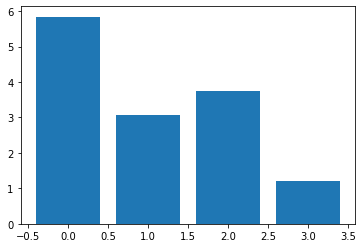

In [61]:
import numpy as np 
import matplotlib.pyplot as plt
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

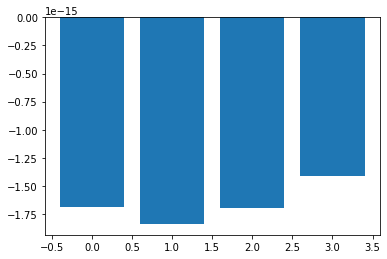

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

plt.bar(list(range(X.shape[1])), np.mean(X_new, axis=0))
plt.show

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y)
sempad = np.mean(scores['test_score'])
print(f"Sem padronização {sempad}")

Sem padronização 0.9733333333333334


In [64]:
scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com padronização {compad}")

Com padronização 0.9600000000000002


In [65]:
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("padronizacao", scaler),
    ("classificador", LogisticRegression())
])

scores = cross_validate(modelo, X, y)
alinha = np.mean(scores['test_score'])
print(f"alinhado {alinha}")

alinhado 0.9600000000000002


In [70]:
scores = cross_validate(modelo, X_new, y)
compad = np.mean(scores['test_score'])
print(f"Com padronização {compad}")

Com padronização 0.9600000000000002


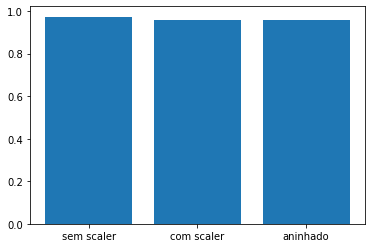

In [66]:
colunas = ["sem scaler", "com scaler", "aninhado"]
plt.bar(colunas, [sempad, compad, alinha])
plt.show()

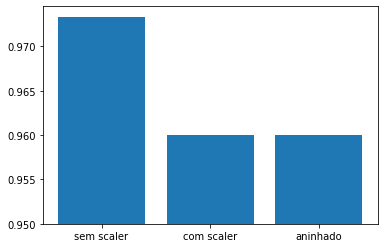

In [67]:
plt.bar(colunas, np.array([sempad, compad, alinha])-0.95, bottom=0.95)
plt.show()

In [71]:
# Aplicação KNN
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import numpy as np 

modelo = KNeighborsClassifier()
scores = cross_validate(modelo, X, y, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

[-0.18257419 -0.         -0.25819889 -0.18257419 -0.        ]
Sem padronização: -0.12466945228345436


In [72]:
from sklearn.model_selection import GridSearchCV

parametros = {'n_neighbors': [3,5,7]}

modelo = GridSearchCV(KNeighborsClassifier(), parametros, 
scoring=make_scorer(mean_squared_error, greater_is_better=False,
squared=False))
modelo.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False))

In [73]:
modelo.cv_results_

{'mean_fit_time': array([0.00164518, 0.        , 0.        ]),
 'std_fit_time': array([0.00329037, 0.        , 0.        ]),
 'mean_score_time': array([0.00010118, 0.00158997, 0.00160255]),
 'std_score_time': array([0.00020237, 0.00317993, 0.00320511]),
 'param_n_neighbors': masked_array(data=[3, 5, 7],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}],
 'split0_test_score': array([-0.18257419, -0.18257419, -0.18257419]),
 'split1_test_score': array([-0.18257419, -0.        , -0.        ]),
 'split2_test_score': array([-0.25819889, -0.25819889, -0.18257419]),
 'split3_test_score': array([-0.18257419, -0.18257419, -0.18257419]),
 'split4_test_score': array([-0., -0., -0.]),
 'mean_test_score': array([-0.16118429, -0.12466945, -0.10954451]),
 'std_test_score': array([0.08574939, 0.1054713 , 0.08944272]),
 'rank_test_score': array([3, 2, 1])}

In [74]:
modelo.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt

ypred = modelo.predict(X)
mse = mean_squared_error(y, ypred)
sqrt(mse)

0.16329931618554522

In [78]:
scores = cross_validate(modelo, X, y, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {sempad}")

[-0.18257419 -0.         -0.18257419 -0.18257419 -0.        ]
Sem padronização: -0.10954451150103321


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

parametros = {'n_neighbors': [3,5,7]}

GridSearchKNN = GridSearchCV(KNeighborsClassifier(), parametros, 
scoring='neg_mean_squared_error')

modelo = Pipeline([
    ("padronizacao", StandardScaler()),
    ("gsknn", GridSearchKNN)
])

scores = cross_validate(modelo, X, y, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

[-0.18257419 -0.18257419 -0.25819889 -0.31622777 -0.        ]
Com padronização: -0.18791500548682194


In [80]:

pipeline = Pipeline([
    ("padronizacao", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

parametros = {'knn__n_neighbors': [3,5,7]}
modelo = GridSearchCV(pipeline, parametros, 
scoring='neg_mean_squared_error')

scores = cross_validate(modelo, X, y, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

[-0.18257419 -0.18257419 -0.25819889 -0.25819889 -0.        ]
Com padronização: -0.17630923023288658
